In [1]:
# Mount Google Drive
"""
No need to execute this block when working on local system.
"""
from google.colab import drive
drive.mount("/content/vdrive", force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/vdrive


In [0]:
# Files to process
"""
Modify the locations below as per your directory struture.
"""
sp_dir = "/content/vdrive/My Drive/Colab Notebooks/Projects/Bondai/SP 500/"
root_dir = "/content/vdrive/My Drive/Colab Notebooks/Projects/Bondai/SP 500/data/"
data_dir = "/content/vdrive/My Drive/Colab Notebooks/Projects/Bondai/SP 500/data/raw/"
prep_dir = "/content/vdrive/My Drive/Colab Notebooks/Projects/Bondai/SP 500/data/prep/"
model_dir = "/content/vdrive/My Drive/Colab Notebooks/Projects/Bondai/SP 500/data/model-1/"

In [0]:
# Loading the csv files
import pandas as pd
actual_df = pd.read_csv(model_dir + "actual_data.csv")
pred_df = pd.read_csv(model_dir + "pred_data.csv")

In [0]:
actual_df["act_short_term"] = actual_df["crr_asst"]/actual_df["crr_libt"]
actual_df["act_long_term"] = actual_df["ncrr_asst"]/actual_df["ncrr_libt"]
actual_df["act_overall"] = (actual_df["crr_asst"] + actual_df["ncrr_asst"])/(actual_df["crr_libt"] + actual_df["ncrr_libt"])

In [0]:
actual_df

,Ticker,net_income,op_income,gross_profit,crr_asst,ncrr_asst,crr_libt,ncrr_libt,act_short_term,act_long_term,act_overall
0,HSIC,5.358810e+08,7.530520e+08,3.595084e+09,4.175220e+09,4.325307e+09,3.218827e+09,1.427756e+09,1.297125,3.029444,1.829415
1,ALXN,7.760000e+07,3.861000e+08,3.756900e+09,3.385000e+09,1.054690e+10,1.174000e+09,3.592600e+09,2.883305,2.935729,2.922817
2,KR,1.907000e+09,2.085000e+09,2.700000e+10,1.111700e+10,2.608000e+10,1.419700e+10,1.609500e+10,0.783053,1.620379,1.227948
3,BBT,3.237000e+09,4.060000e+09,1.099200e+10,0.000000e+00,2.256970e+11,0.000000e+00,1.955190e+11,NaN,1.154348,1.154348
4,DIS,1.259800e+10,1.480400e+10,2.670800e+10,1.682500e+10,8.177300e+10,1.786000e+10,2.790600e+10,0.942049,2.930302,2.154394
5,MMC,1.650000e+09,2.761000e+09,1.495000e+10,5.934000e+09,1.564400e+10,4.924000e+09,9.070000e+09,1.205118,1.724807,1.541947
6,MAR,1.907000e+09,2.366000e+09,3.674000e+09,2.706000e+09,2.099000e+10,6.437000e+09,1.503400e+10,0.420382,1.396169,1.103628
7,CELG,4.046000e+09,5.191000e+09,1.469400e+10,9.067000e+09,2.641300e+10,4.057000e+09,2.526200e+10,2.234903,1.045563,1.210137
8,VMC,5.158050e+08,7.477130e+08,1.100945e+09,1.079145e+09,8.752985e+09,6.025500e+08,4.026677e+09,1.790963,2.173749,2.123925
9,RHI,4.342880e+08,5.872200e+08,2.410014e+09,1.473610e+09,4.294870e+08,8.195360e+08,2.036300e+07,1.798103,21.091539,2.265864


In [0]:
pred_df["pred_short_term"] = pred_df["crr_asst"]/pred_df["crr_libt"]
pred_df["pred_long_term"] = pred_df["ncrr_asst"]/pred_df["ncrr_libt"]
pred_df["pred_overall"] = (pred_df["crr_asst"] + pred_df["ncrr_asst"])/(pred_df["crr_libt"] + pred_df["ncrr_libt"])

In [0]:
pred_df

,Ticker,net_income,op_income,gross_profit,crr_asst,ncrr_asst,crr_libt,ncrr_libt,pred_short_term,pred_long_term,pred_overall
0,HSIC,3.679738e+10,3.015203e+10,4.938941e+10,1.307145e+10,4.686288e+10,2.683307e+10,8.592428e+09,0.487140,5.453974,1.691842
1,ALXN,5.243959e+09,1.972108e+10,1.880685e+10,1.686743e+10,9.999485e+10,7.131052e+09,6.809464e+10,2.365349,1.468469,1.553489
2,KR,1.344144e+10,7.161474e+10,1.825964e+10,6.923701e+10,2.435666e+11,1.125278e+11,2.372352e+11,0.615288,1.026688,0.894330
3,BBT,1.108789e+10,2.837211e+10,4.390100e+10,0.000000e+00,1.516303e+12,0.000000e+00,1.258742e+12,NaN,1.204618,1.204618
4,DIS,5.498764e+10,-4.170145e+10,9.421502e+10,6.509739e+10,5.387763e+11,1.378007e+11,2.112248e+11,0.472403,2.550725,1.730171
5,MMC,3.533200e+10,3.706890e+10,8.949936e+10,2.270157e+10,1.271019e+11,3.313393e+10,6.364128e+10,0.685146,1.997162,1.547953
6,MAR,4.059627e+11,4.884161e+10,1.451784e+11,5.826403e+10,8.233906e+11,1.462743e+11,-7.911217e+10,0.398320,-10.407888,13.127251
7,CELG,8.112943e+09,2.936682e+10,6.024234e+10,6.403268e+10,1.066248e+11,2.186884e+10,1.407706e+11,2.928032,0.757436,1.049299
8,VMC,6.086551e+08,1.095075e+09,3.728789e+09,4.547371e+09,5.404595e+10,3.042625e+09,2.720648e+10,1.494555,1.986510,1.937027
9,RHI,-4.794914e+09,1.166562e+10,1.435685e+10,4.605498e+09,3.096712e+09,5.344396e+09,1.369185e+08,0.861743,22.617183,1.405176


In [0]:
actual_rating = actual_df[["Ticker", "act_short_term", "act_long_term", "act_overall"]]
actual_rating.set_index("Ticker", inplace = True)

In [0]:
actual_rating

,act_short_term,act_long_term,act_overall
Ticker,,,
HSIC,1.297125,3.029444,1.829415
ALXN,2.883305,2.935729,2.922817
KR,0.783053,1.620379,1.227948
BBT,NaN,1.154348,1.154348
DIS,0.942049,2.930302,2.154394
MMC,1.205118,1.724807,1.541947
MAR,0.420382,1.396169,1.103628
CELG,2.234903,1.045563,1.210137
VMC,1.790963,2.173749,2.123925


In [0]:
pred_rating = pred_df[["Ticker", "pred_short_term", "pred_long_term", "pred_overall"]]
pred_rating.set_index("Ticker", inplace = True)
pred_rating

,pred_short_term,pred_long_term,pred_overall
Ticker,,,
HSIC,0.487140,5.453974,1.691842
ALXN,2.365349,1.468469,1.553489
KR,0.615288,1.026688,0.894330
BBT,NaN,1.204618,1.204618
DIS,0.472403,2.550725,1.730171
MMC,0.685146,1.997162,1.547953
MAR,0.398320,-10.407888,13.127251
CELG,2.928032,0.757436,1.049299
VMC,1.494555,1.986510,1.937027


In [0]:
rating_df = pd.concat([actual_rating, pred_rating], axis = 1)
rating_df

,act_short_term,act_long_term,act_overall,pred_short_term,pred_long_term,pred_overall
AAP,1.565242,1.844393,1.646798,-1.917622,3.157907,-0.955787
ABC,0.929123,1.744464,1.088099,0.728736,1.798877,0.943251
ADP,1.046382,1.898608,1.138829,0.662284,1.281766,0.725240
AFL,NaN,1.200626,1.200626,NaN,1.251722,1.251722
AGN,1.130502,3.081675,2.776788,0.004880,-2.506055,-4.557095
ALGN,1.881997,6.976938,2.566962,1.764415,9.601509,3.149538
ALXN,2.883305,2.935729,2.922817,2.365349,1.468469,1.553489
AMAT,2.703723,1.023740,1.634501,2.239882,1.006830,1.496288
AWK,0.372970,1.541048,1.381796,0.206861,2.103010,1.745378
AZO,0.921886,0.806883,0.860099,0.584291,0.706142,0.655178


In [0]:
rounded_df = round(rating_df)
rounded_df

,act_short_term,act_long_term,act_overall,pred_short_term,pred_long_term,pred_overall
AAP,2.0,2.0,2.0,-2.0,3.0,-1.0
ABC,1.0,2.0,1.0,1.0,2.0,1.0
ADP,1.0,2.0,1.0,1.0,1.0,1.0
AFL,NaN,1.0,1.0,NaN,1.0,1.0
AGN,1.0,3.0,3.0,0.0,-3.0,-5.0
ALGN,2.0,7.0,3.0,2.0,10.0,3.0
ALXN,3.0,3.0,3.0,2.0,1.0,2.0
AMAT,3.0,1.0,2.0,2.0,1.0,1.0
AWK,0.0,2.0,1.0,0.0,2.0,2.0
AZO,1.0,1.0,1.0,1.0,1.0,1.0


In [0]:
# rounded_df.to_csv(model_dir + "credit_ratings_1.0.csv")
rounded_df = pd.read_csv(model_dir + "credit_ratings_1.0.csv")

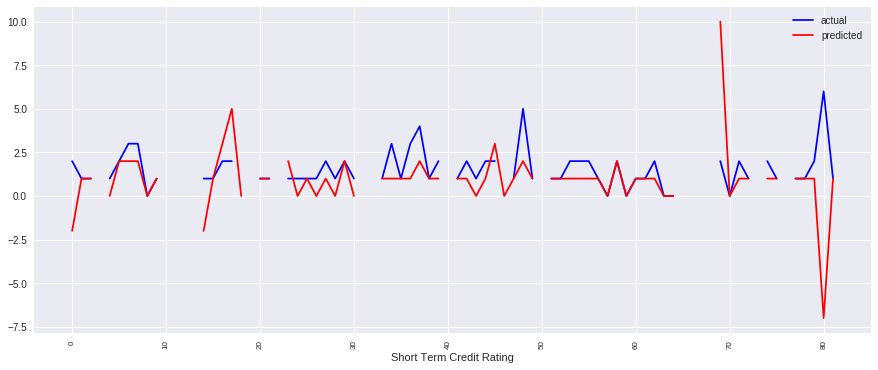

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 6))
plt.plot(rounded_df["act_short_term"], "b", label = "actual")
plt.plot(rounded_df["pred_short_term"], "r", label = "predicted")
plt.legend(loc='upper right')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90, fontsize = 8)
plt.xlabel("Short Term Credit Rating")
plt.show()

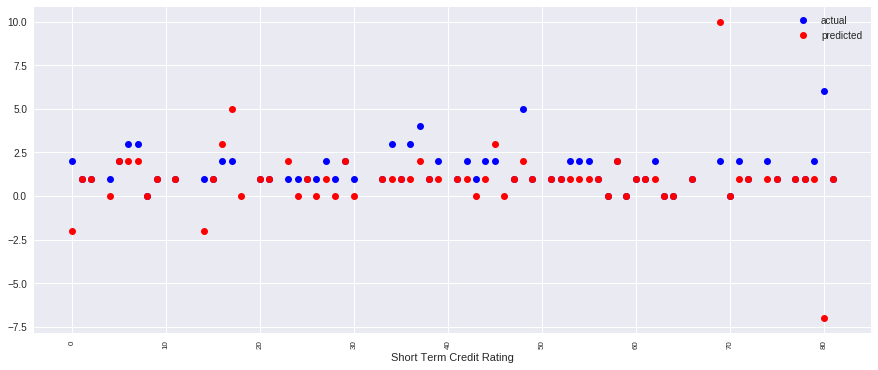

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 6))
plt.plot(rounded_df["act_short_term"], "b", label = "actual", marker = "o", linestyle = "none")
plt.plot(rounded_df["pred_short_term"], "r", label = "predicted", marker = "o", linestyle = "none")
plt.legend(loc='upper right')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90, fontsize = 8)
plt.xlabel("Short Term Credit Rating")
plt.show()

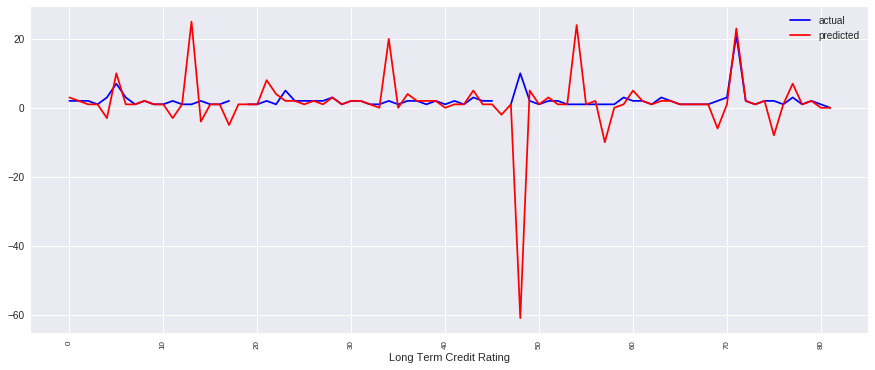

In [36]:
plt.figure(figsize = (15, 6))
plt.plot(rounded_df["act_long_term"], "b", label = "actual")
plt.plot(rounded_df["pred_long_term"], "r", label = "predicted")
plt.legend(loc='upper right')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90, fontsize = 8)
plt.xlabel("Long Term Credit Rating")
plt.show()

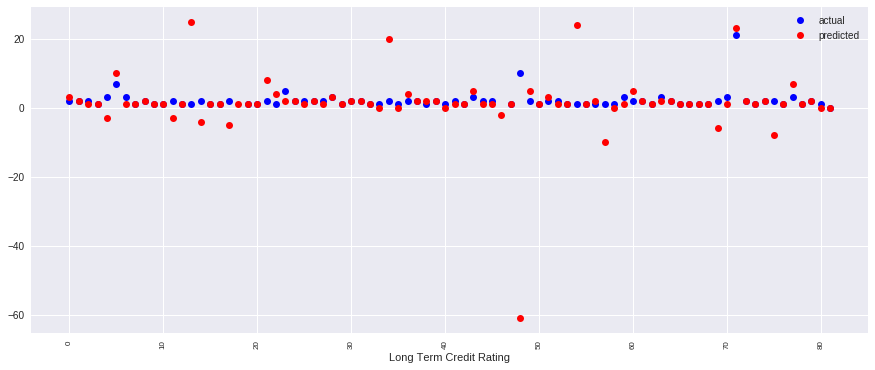

In [37]:
plt.figure(figsize = (15, 6))
plt.plot(rounded_df["act_long_term"], "b", label = "actual", marker = "o", linestyle = "none")
plt.plot(rounded_df["pred_long_term"], "r", label = "predicted", marker = "o", linestyle = "none")
plt.legend(loc='upper right')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90, fontsize = 8)
plt.xlabel("Long Term Credit Rating")
plt.show()

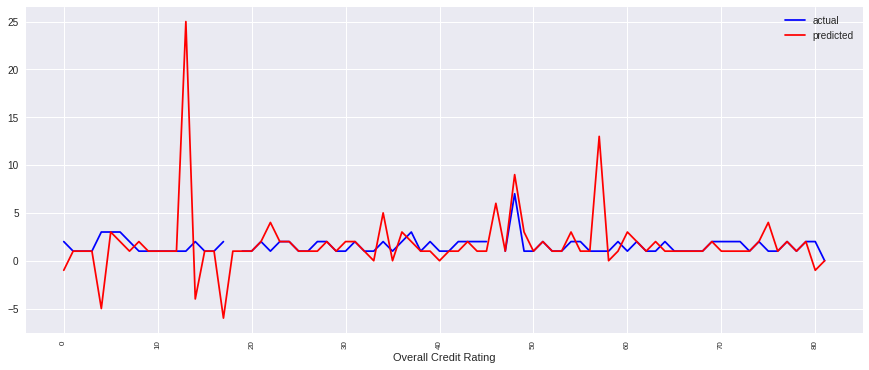

In [38]:
plt.figure(figsize = (15, 6))
plt.plot(rounded_df["act_overall"], "b", label = "actual")
plt.plot(rounded_df["pred_overall"], "r", label = "predicted")
plt.legend(loc='upper right')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90, fontsize = 8)
plt.xlabel("Overall Credit Rating")
plt.show()

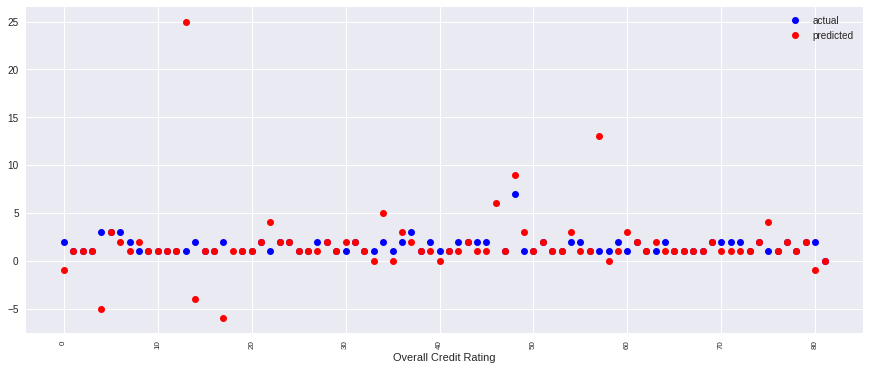

In [39]:
plt.figure(figsize = (15, 6))
plt.plot(rounded_df["act_overall"], "b", label = "actual", marker = "o", linestyle = "none")
plt.plot(rounded_df["pred_overall"], "r", label = "predicted", marker = "o", linestyle = "none")
plt.legend(loc='upper right')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90, fontsize = 8)
plt.xlabel("Overall Credit Rating")
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


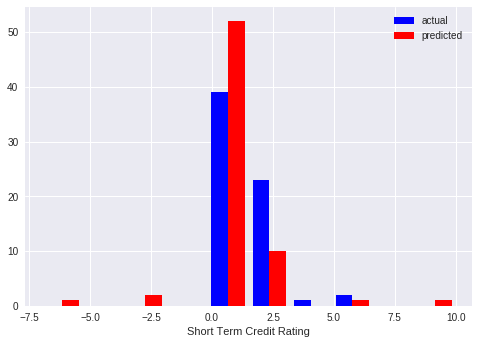

In [0]:
import numpy as np
plt.hist([rounded_df["act_short_term"], rounded_df["pred_short_term"]], label=['actual', 'predicted'], color = ["b", "r"])
plt.legend(loc='upper right')
plt.xlabel("Short Term Credit Rating")
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


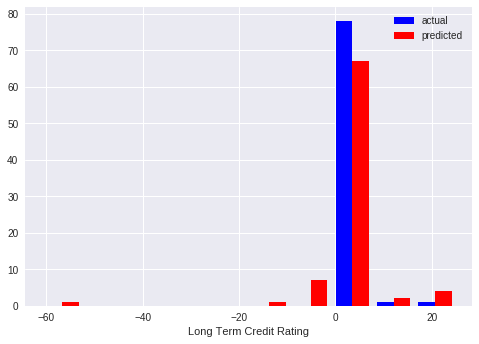

In [0]:
plt.hist([rounded_df["act_long_term"], rounded_df["pred_long_term"]], label=['actual', 'predicted'], color = ["b", "r"])
plt.legend(loc='upper right')
plt.xlabel("Long Term Credit Rating")
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


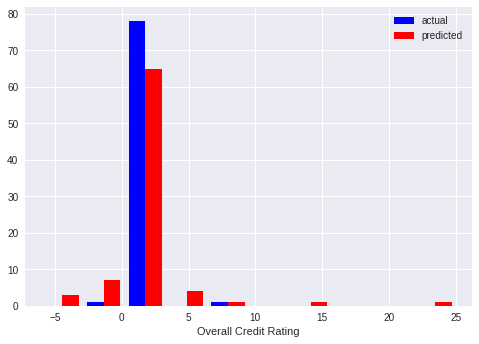

In [0]:
plt.hist([rounded_df["act_overall"], rounded_df["pred_overall"]], label=['actual', 'predicted'], color = ["b", "r"])
plt.legend(loc='upper right')
plt.xlabel("Overall Credit Rating")
plt.show()